In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, PredictionErrorDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('combined_dataset.csv')

In [150]:
data.head()

Unnamed: 0  Time  Temprature  %tanD       Resistivity  Permittivity  \
0           0     1          30    0.0  1249215000000000          2.15   
1           1     2          30    0.0  1249215000000000          2.15   
2           2     3          30    0.0  1249215000000000          2.15   
3           3     4          30    0.0  1249215000000000          2.15   
4           4     5          30    0.0  1249215000000000          2.15   

   I_pol(t)(uA)  hour   BDV  
0       0.00583     0  29.0  
1       0.00584     0  29.0  
2       0.00581     0  29.0  
3       0.00575     0  29.0  
4       0.00569     0  29.0

In [151]:
data = data.drop('Unnamed: 0', axis=1)
print(data.dtypes)

Time              int64
Temprature        int64
%tanD           float64
Resistivity       int64
Permittivity    float64
I_pol(t)(uA)    float64
hour              int64
BDV             float64
dtype: object


In [152]:
select_columns=['Time','Temprature', '%tanD', 'Resistivity', 'Permittivity', 'I_pol(t)(uA)']
givenHour=288
# givenTemp=30
givenTemp=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]
data_temp_hr=[]
for temp in givenTemp:
    data_temp_hr_curr = data[(data['hour'] == givenHour) & (data['Temprature'] == temp)]
    data_temp_hr.append(data_temp_hr_curr)

In [153]:
# data_temp_hr.shape
for count in range(17):
    print(f"data shape for {givenTemp[count]} is: {data_temp_hr[count].shape}")

data shape for 30 is: (470, 8)
data shape for 35 is: (470, 8)
data shape for 40 is: (470, 8)
data shape for 45 is: (470, 8)
data shape for 50 is: (470, 8)
data shape for 55 is: (470, 8)
data shape for 60 is: (470, 8)
data shape for 65 is: (470, 8)
data shape for 70 is: (470, 8)
data shape for 75 is: (470, 8)
data shape for 80 is: (470, 8)
data shape for 85 is: (470, 8)
data shape for 90 is: (470, 8)
data shape for 95 is: (470, 8)
data shape for 100 is: (470, 8)
data shape for 105 is: (470, 8)
data shape for 110 is: (470, 8)


In [154]:
# data_temp_hr.head()
for count in range(17):
    print(f"data head for {givenTemp[count]} is: {data_temp_hr[count].head()}")

data head for 30 is:        Time  Temprature  %tanD     Resistivity  Permittivity  I_pol(t)(uA)  \
23970     1          30    0.0  75201500000000           2.1      0.036766   
23971     2          30    0.0  75201500000000           2.1      0.036731   
23972     3          30    0.0  75201500000000           2.1      0.036698   
23973     4          30    0.0  75201500000000           2.1      0.036664   
23974     5          30    0.0  75201500000000           2.1      0.036631   

       hour   BDV  
23970   288  32.5  
23971   288  32.5  
23972   288  32.5  
23973   288  32.5  
23974   288  32.5  
data head for 35 is:        Time  Temprature  %tanD     Resistivity  Permittivity  I_pol(t)(uA)  \
24440     1          35    0.0  71472500000000          2.09      0.042367   
24441     2          35    0.0  71472500000000          2.09      0.042335   
24442     3          35    0.0  71472500000000          2.09      0.042302   
24443     4          35    0.0  71472500000000          2

In [155]:
# unique_counts = data_temp_hr.nunique()
# print(unique_counts)
for count in range(17):
    print(f"data uniqueCounts for {givenTemp[count]} is: {data_temp_hr[count].nunique()}")
    print("\n")

data uniqueCounts for 30 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


data uniqueCounts for 35 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


data uniqueCounts for 40 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


data uniqueCounts for 45 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


data uniqueCounts for 50 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV            

In [156]:
# data_temp_hr.info()
for count in range(17):
    print(f"data info for {givenTemp[count]} is: {data_temp_hr[count].info}")
    print("\n")

data info for 30 is: <bound method DataFrame.info of        Time  Temprature  %tanD     Resistivity  Permittivity  I_pol(t)(uA)  \
23970     1          30    0.0  75201500000000           2.1      0.036766   
23971     2          30    0.0  75201500000000           2.1      0.036731   
23972     3          30    0.0  75201500000000           2.1      0.036698   
23973     4          30    0.0  75201500000000           2.1      0.036664   
23974     5          30    0.0  75201500000000           2.1      0.036631   
...     ...         ...    ...             ...           ...           ...   
24435   466          30    0.0  75201500000000           2.1      0.033525   
24436   467          30    0.0  75201500000000           2.1      0.033524   
24437   468          30    0.0  75201500000000           2.1      0.033524   
24438   469          30    0.0  75201500000000           2.1      0.033524   
24439   470          30    0.0  75201500000000           2.1      0.033524   

       hou

In [157]:
# data_temp_hr.isnull().sum()
for count in range(17):
    print(f"data nullCountSum for {givenTemp[count]} is: {data_temp_hr[count].isnull().sum()}")
    print("\n")

data nullCountSum for 30 is: Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64


data nullCountSum for 35 is: Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64


data nullCountSum for 40 is: Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64


data nullCountSum for 45 is: Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64


data nullCountSum for 50 is: Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64


data nullCountSum for 55 is: Time            0
Temprature   

In [158]:
# data_temp_hr.describe()
for count in range(17):
    print(f"data describe for {givenTemp[count]} is: {data_temp_hr[count].describe()}")
    print("\n")

data describe for 30 is:              Time  Temprature  %tanD   Resistivity  Permittivity  \
count  470.000000       470.0  470.0  4.700000e+02  4.700000e+02   
mean   235.500000        30.0    0.0  7.520150e+13  2.100000e+00   
std    135.821574         0.0    0.0  0.000000e+00  8.891248e-16   
min      1.000000        30.0    0.0  7.520150e+13  2.100000e+00   
25%    118.250000        30.0    0.0  7.520150e+13  2.100000e+00   
50%    235.500000        30.0    0.0  7.520150e+13  2.100000e+00   
75%    352.750000        30.0    0.0  7.520150e+13  2.100000e+00   
max    470.000000        30.0    0.0  7.520150e+13  2.100000e+00   

       I_pol(t)(uA)   hour    BDV  
count    470.000000  470.0  470.0  
mean       0.034160  288.0   32.5  
std        0.000811    0.0    0.0  
min        0.033524  288.0   32.5  
25%        0.033581  288.0   32.5  
50%        0.033778  288.0   32.5  
75%        0.034453  288.0   32.5  
max        0.036766  288.0   32.5  


data describe for 35 is:            

In [159]:
# label_encoder = LabelEncoder()
# for count in range(17):
#     for column in data_temp_hr[count].columns:
#         data_temp_hr[count][column] = label_encoder.fit_transform(data_temp_hr[count][column])

In [160]:
# scaler = MinMaxScaler()
# data_temp_hr_scaled=[]
# for count in range(17):
#     data_temp_hr_scaled.append(pd.DataFrame(scaler.fit_transform(data_temp_hr[count]), columns=data_temp_hr[count].columns))
data_temp_hr_scaled=data_temp_hr

In [161]:
# data_temp_hr_scaled.head()
for count in range(17):
    print(f"scaledData shape for {givenTemp[count]} is: {data_temp_hr_scaled[count].head()}\n")

scaledData shape for 30 is:        Time  Temprature  %tanD     Resistivity  Permittivity  I_pol(t)(uA)  \
23970     1          30    0.0  75201500000000           2.1      0.036766   
23971     2          30    0.0  75201500000000           2.1      0.036731   
23972     3          30    0.0  75201500000000           2.1      0.036698   
23973     4          30    0.0  75201500000000           2.1      0.036664   
23974     5          30    0.0  75201500000000           2.1      0.036631   

       hour   BDV  
23970   288  32.5  
23971   288  32.5  
23972   288  32.5  
23973   288  32.5  
23974   288  32.5  

scaledData shape for 35 is:        Time  Temprature  %tanD     Resistivity  Permittivity  I_pol(t)(uA)  \
24440     1          35    0.0  71472500000000          2.09      0.042367   
24441     2          35    0.0  71472500000000          2.09      0.042335   
24442     3          35    0.0  71472500000000          2.09      0.042302   
24443     4          35    0.0  7147250000

In [162]:
# unique_counts = data_temp_hr_scaled.nunique()
# print(unique_counts)
for count in range(17):
    print(f"scaledData uniqueCounts for {givenTemp[count]} is: {data_temp_hr_scaled[count].nunique()}")
    print("\n")

scaledData uniqueCounts for 30 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


scaledData uniqueCounts for 35 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


scaledData uniqueCounts for 40 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


scaledData uniqueCounts for 45 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


scaledData uniqueCounts for 50 is: Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour 

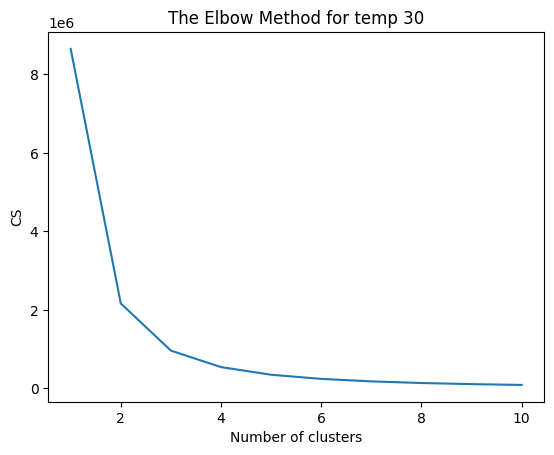

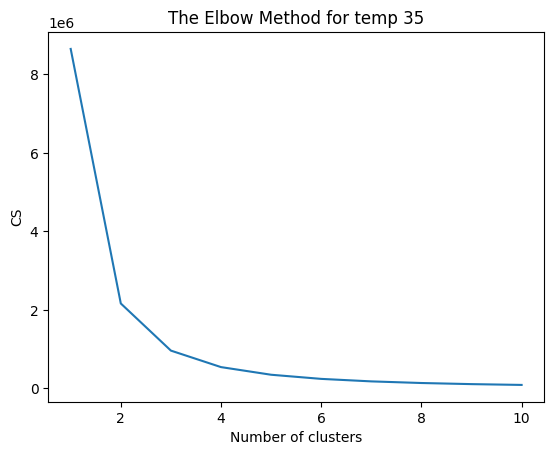

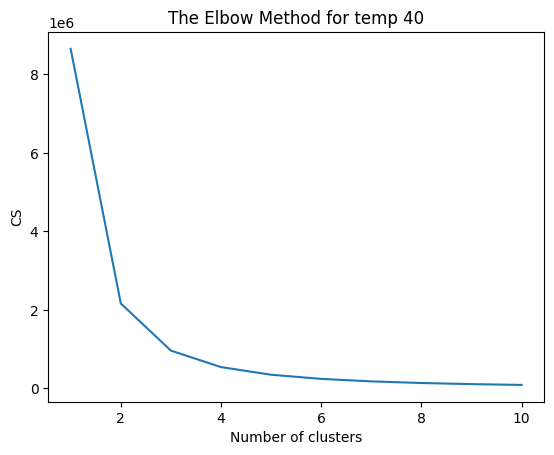

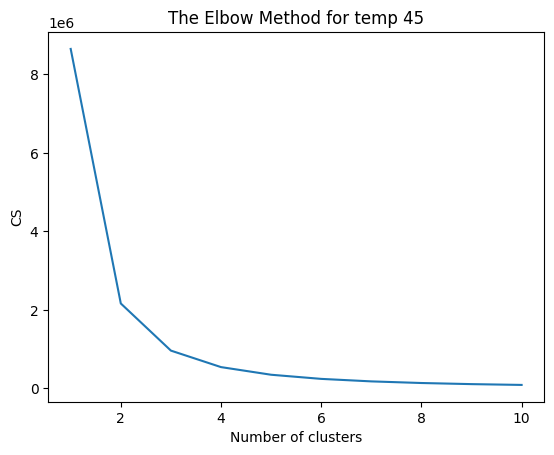

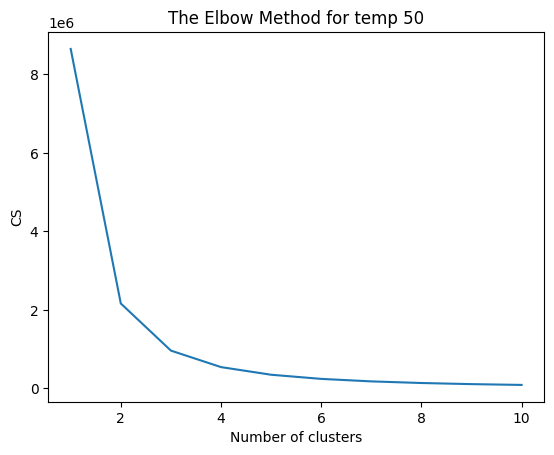

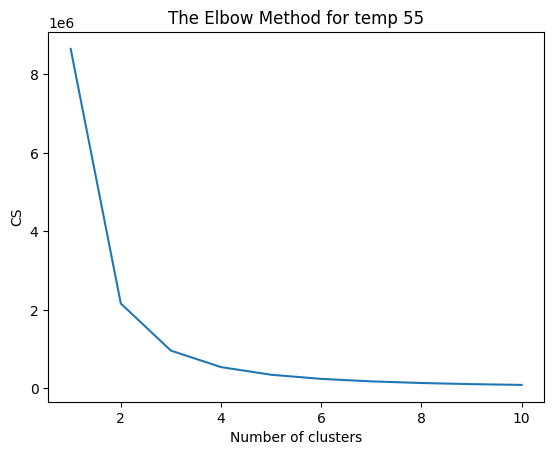

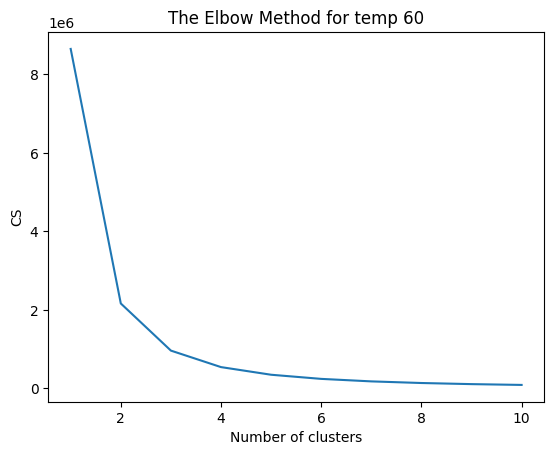

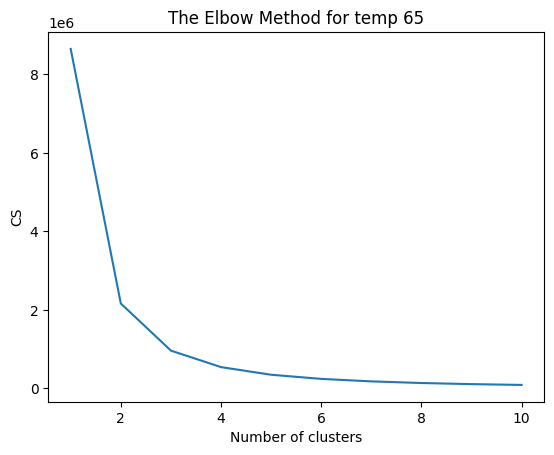

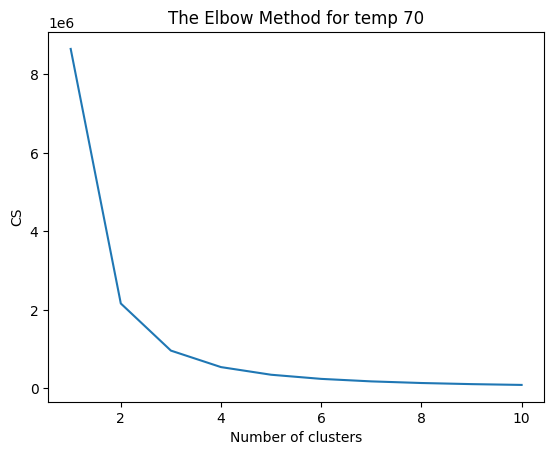

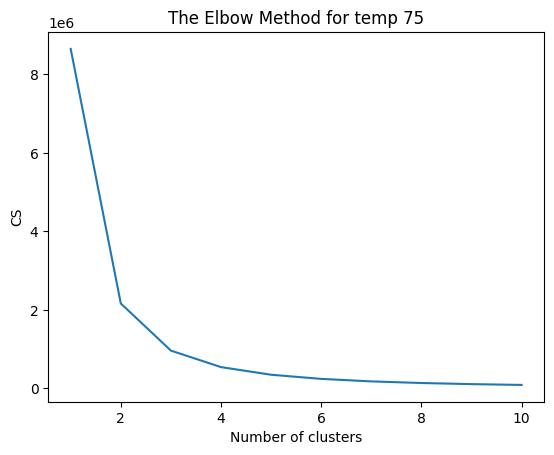

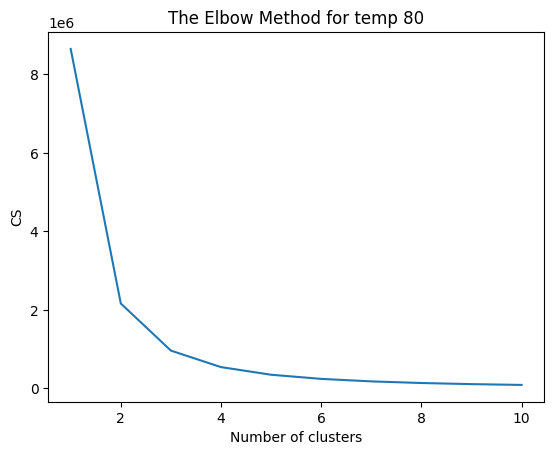

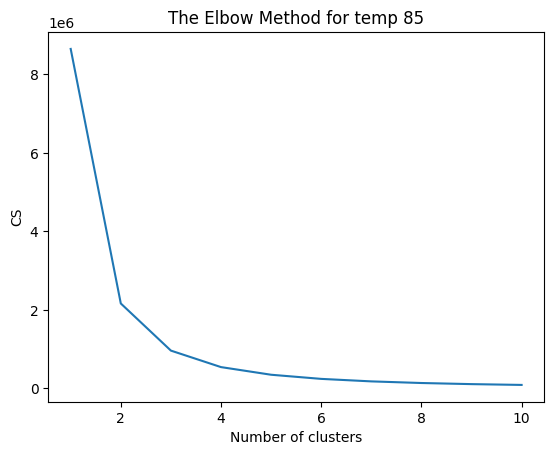

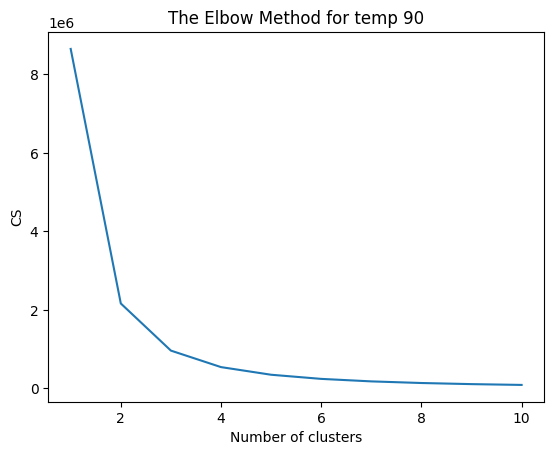

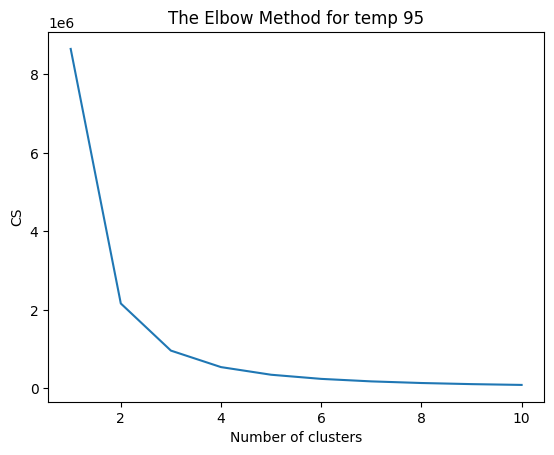

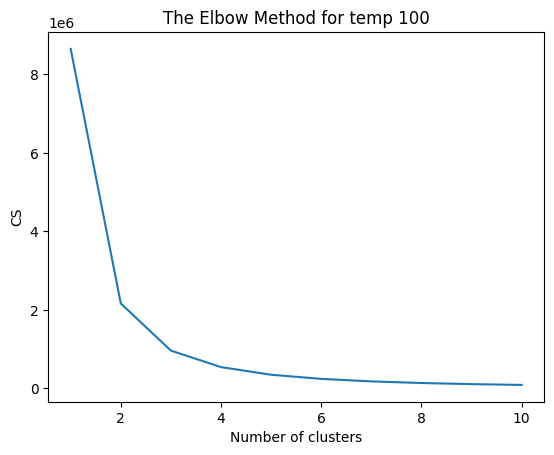

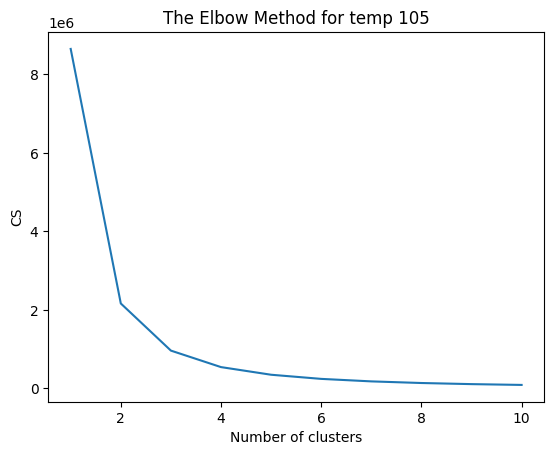

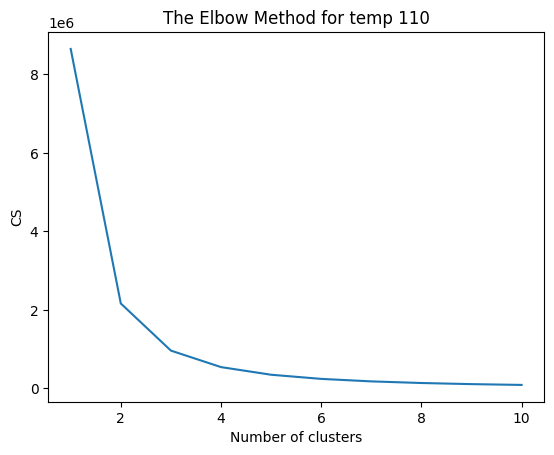

In [163]:
from sklearn.cluster import KMeans
for count in range(17):
    cs = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(data_temp_hr_scaled[count])
        cs.append(kmeans.inertia_)
    plt.plot(range(1, 11), cs)
    plt.title(f"The Elbow Method for temp {givenTemp[count]}")
    plt.xlabel('Number of clusters')
    plt.ylabel('CS')
    plt.show()

In [164]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 11)
numberOfCluster=[]
for count in range(17):
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data_temp_hr_scaled[count])
        score = silhouette_score(data_temp_hr_scaled[count], cluster_labels)
        silhouette_scores.append(score)
    maxVal=-1
    currCluster=-1
    for it in range(len(silhouette_scores)):
        if silhouette_scores[it] > maxVal:
            maxVal=silhouette_scores[it]
            currCluster=it+2
    numberOfCluster.append(currCluster)
print(numberOfCluster)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [165]:
from sklearn.ensemble import RandomForestRegressor  # Or RandomForestClassifier for classification
from sklearn.model_selection import cross_val_score
import numpy as np

bestEstimators=[]
for count in range(17):
    X = data_temp_hr_scaled[count].iloc[:,:-3]  # Features
    y = data_temp_hr_scaled[count].iloc[:,-3]   # Target variable (continuous for regression)

    # Test different values of n_estimators
    n_estimators_range = [50, 100, 200, 300, 500]
    mean_scores = []

    # Loop over different n_estimators values
    for n in n_estimators_range:
        rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
        # Cross-validation with negative mean absolute error as the scoring metric
        scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
        mean_scores.append(np.mean(scores))

    # Find the best n_estimators
    best_n_estimators = n_estimators_range[np.argmax(mean_scores)]
    bestEstimators.append(best_n_estimators)

print(bestEstimators)


[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 500]


In [166]:
# All ML Models
# Function to split data into features and labels
def split_data(data):
    X = data[['Time', 'Temprature', '%tanD', 'Resistivity', 'Permittivity', 'hour', 'BDV']]
    y = data['I_pol(t)(uA)']
    return X, y

def train_linear_regression(X_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    return linear_model

# Function to train Polynomial Regression model
def train_polynomial_regression(X_train, y_train, degree=2):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    return poly_model, poly_features

# Function to train Neural Network model
def train_neural_network(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', learning_rate_init=0.001, max_iter=2000, random_state=1)
    nn_model.fit(X_train_scaled, y_train)
    return nn_model, scaler

# Function to train K-Nearest Neighbors model
def train_knn(X_train, y_train, n_neighbors):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    return knn_model

# Function to train Support Vector Regression model
def train_svr(X_train, y_train):
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train, y_train)
    return svr_model

# Function to train Decision Tree Regression model
def train_decision_tree(X_train, y_train):
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)
    return tree_model

# Function to train Random Forest Regression model
def train_random_forest(X_train, y_train,n_estimators):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Function to train Gradient Boosting Regression model
def train_gradient_boosting(X_train, y_train):
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
    gb_model.fit(X_train, y_train)
    return gb_model

# Function to predict with a model (for Polynomial Regression, pass the poly_features as well)
def predict(model, X_test, poly_features=None, scaler=None):
    if poly_features:
        X_test_transformed = poly_features.transform(X_test)
        return model.predict(X_test_transformed)
    elif scaler:
        X_test_scaled = scaler.transform(X_test)
        return model.predict(X_test_scaled)
    return model.predict(X_test)

# Function to evaluate models (returns a dictionary of metrics)
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'R2 Score': r2, 'MAE': mae}

# Function to save results to a text file
def save_results_to_file(results, file_path='result.txt'):
    with open(file_path, 'w') as f:
        f.write("Model Comparison Results:\n")
        f.write("Model\tMSE\tR2 Score\tMAE\tMean % Error\n")
        for i in range(len(results['Model'])):
            f.write(f"{results['Model'][i]}\t{results['MSE'][i]:.4f}\t{results['R2 Score'][i]:.4f}\t{results['MAE'][i]:.4f}\t{results['Mean % Error'][i]:.4f}\n")

# Function to compare models and print results
def compare_models(results):
    from IPython.display import display
    comparison_df = pd.DataFrame(results)
    display(comparison_df.sort_values(by='Mean % Error', ascending=True))
    return comparison_df  # Return for further use

# Function to calculate mean percentage error
def mean_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual) * 100)


In [167]:
def store_results_and_plot(results, model_name, metrics, y_test, y_pred):
    """
    Stores the evaluation metrics in the results dictionary and displays the prediction error plot 
    with labels indicating the algorithm name.

    Parameters:
    - results: Dictionary to store evaluation metrics
    - model_name: Name of the model (e.g., 'Linear Regression')
    - metrics: Dictionary containing evaluation metrics (e.g., 'MSE', 'R2 Score', 'MAE')
    - y_test: Actual target values from the test set
    - y_pred: Predicted target values
    """
    global subplot_idx  # Use the global subplot index to track which subplot to use
    ax = plt.subplot(3, 2, subplot_idx)
    # Store the results in the results dictionary
    results['Model'].append(model_name)
    results['MSE'].append(metrics['MSE'])
    results['R2 Score'].append(metrics['R2 Score'])
    results['MAE'].append(metrics['MAE'])
    results['Mean % Error'].append(mean_percentage_error(y_test, y_pred))

    # Create a prediction error plot with kind='actual_vs_predicted'
    display = PredictionErrorDisplay.from_predictions(y_test, y_pred, kind='actual_vs_predicted',ax=ax)

    # Customize the plot with labels and titles
    display.ax_.set_title(f'Actual vs Predicted: {model_name}')
    subplot_idx += 1 

Accuracy test for Temprature 30: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  8.644729e-11  0.999884  0.000003      0.009097
2  Random Forest Regression  9.151344e-11  0.999877  0.000005      0.014580
1  Decision Tree Regression  1.782847e-10  0.999760  0.000008      0.023915

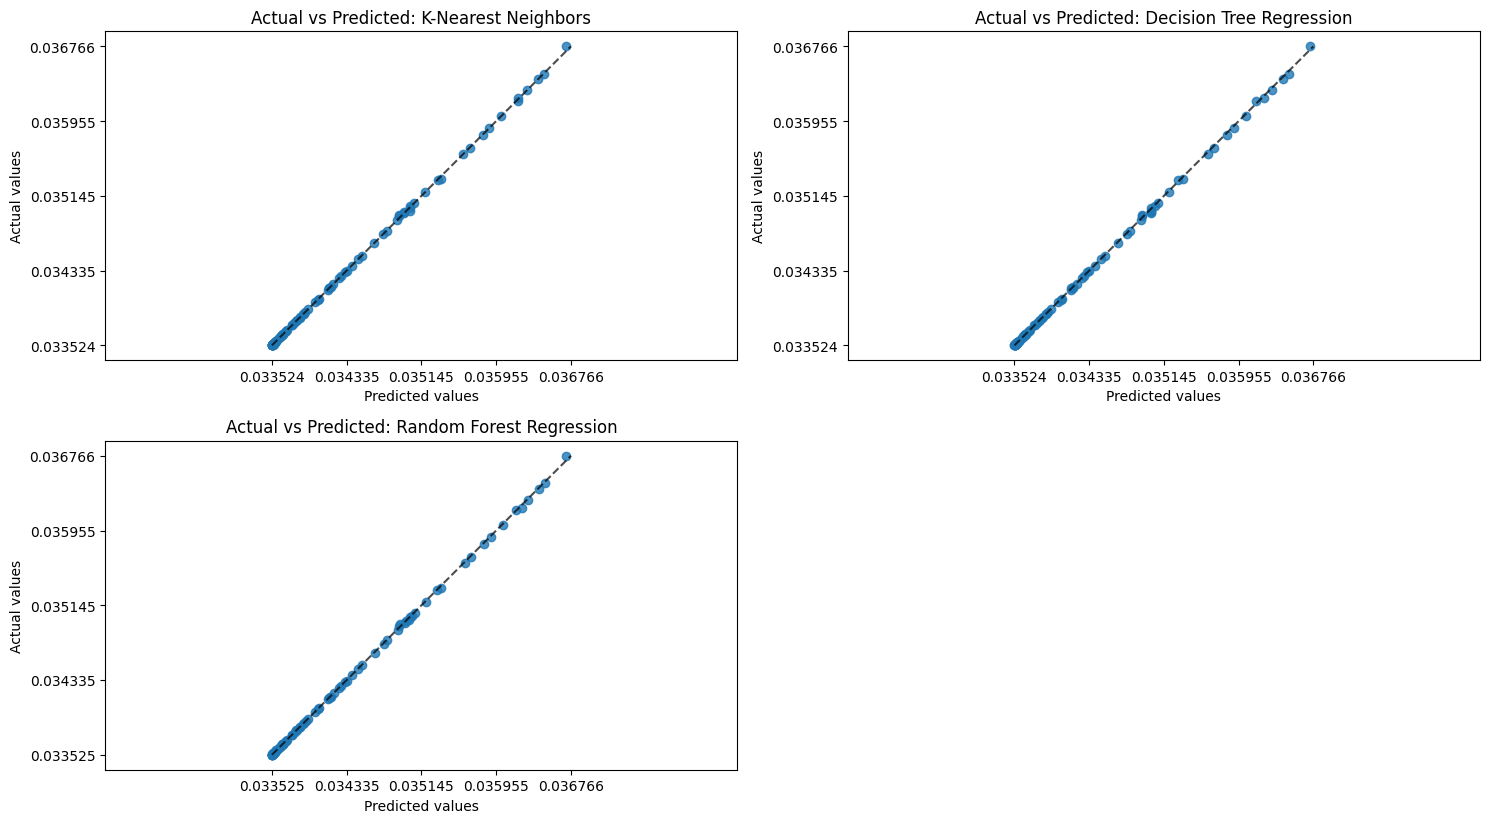

Accuracy test for Temprature 35: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.170871e-10  0.999929  0.000004      0.010139
2  Random Forest Regression  1.170099e-10  0.999929  0.000007      0.016529
1  Decision Tree Regression  2.450044e-10  0.999852  0.000011      0.027788

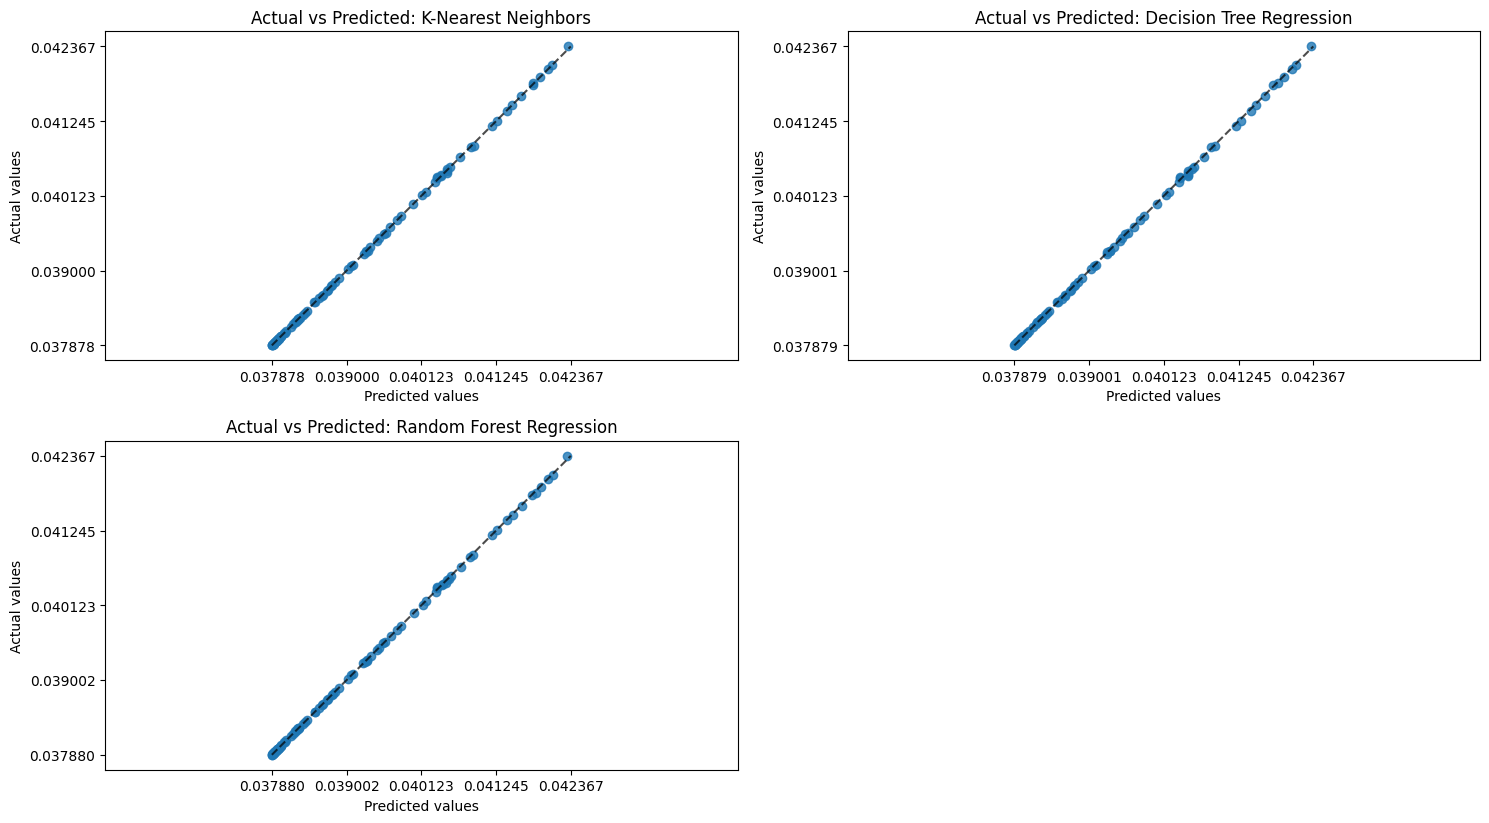

Accuracy test for Temprature 40: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  2.344406e-10  0.999928  0.000006      0.011424
2  Random Forest Regression  2.346006e-10  0.999928  0.000009      0.018615
1  Decision Tree Regression  4.902170e-10  0.999850  0.000016      0.031280

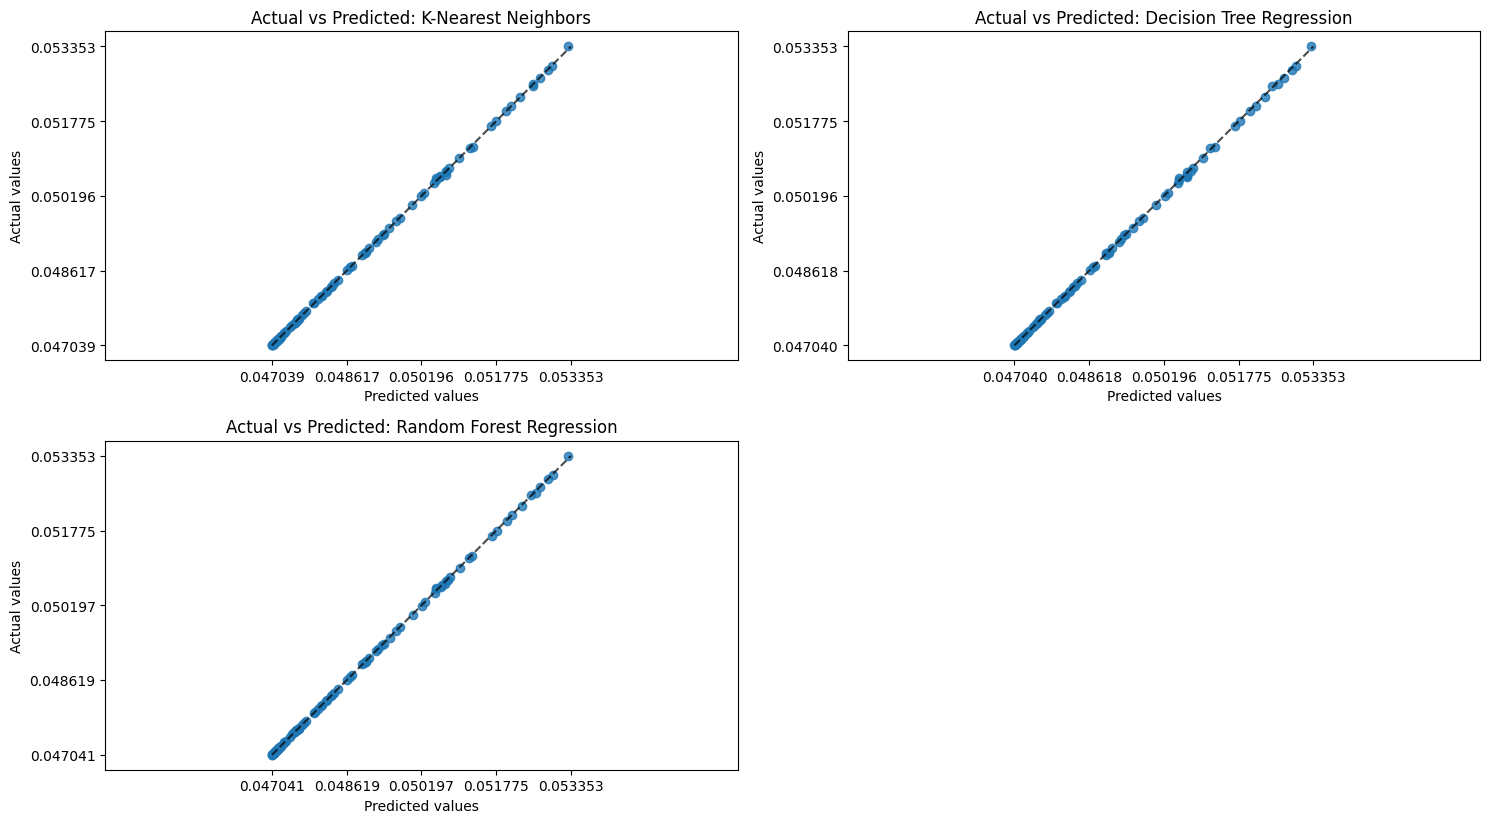

Accuracy test for Temprature 45: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  3.470680e-10  0.999936  0.000007      0.011697
2  Random Forest Regression  3.442496e-10  0.999937  0.000012      0.019164
1  Decision Tree Regression  7.298209e-10  0.999865  0.000020      0.032391

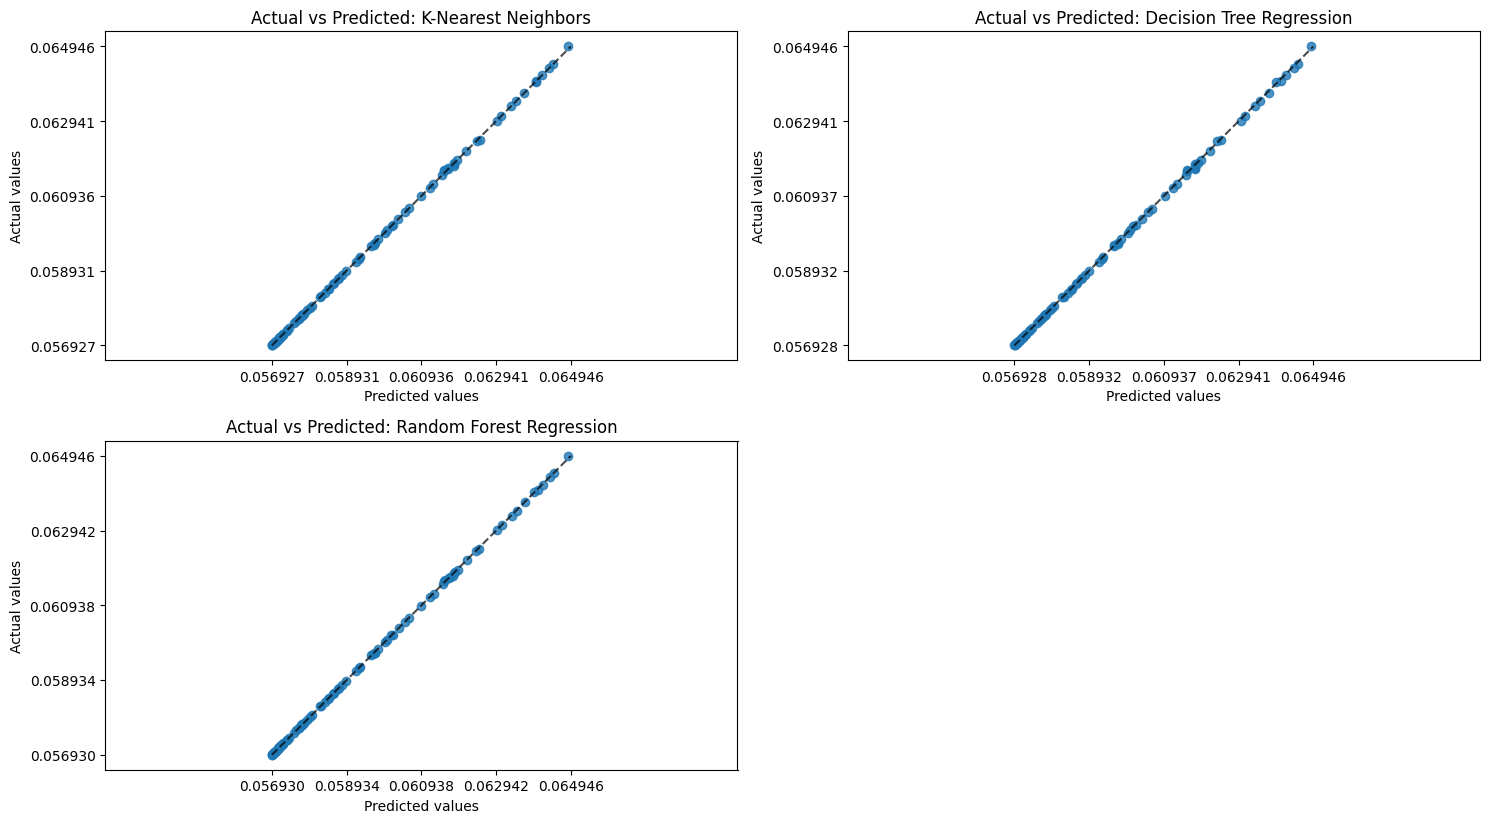

Accuracy test for Temprature 50: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  5.810976e-10  0.999939  0.000009      0.012917
2  Random Forest Regression  5.744452e-10  0.999940  0.000015      0.021222
1  Decision Tree Regression  1.225530e-09  0.999872  0.000026      0.035974

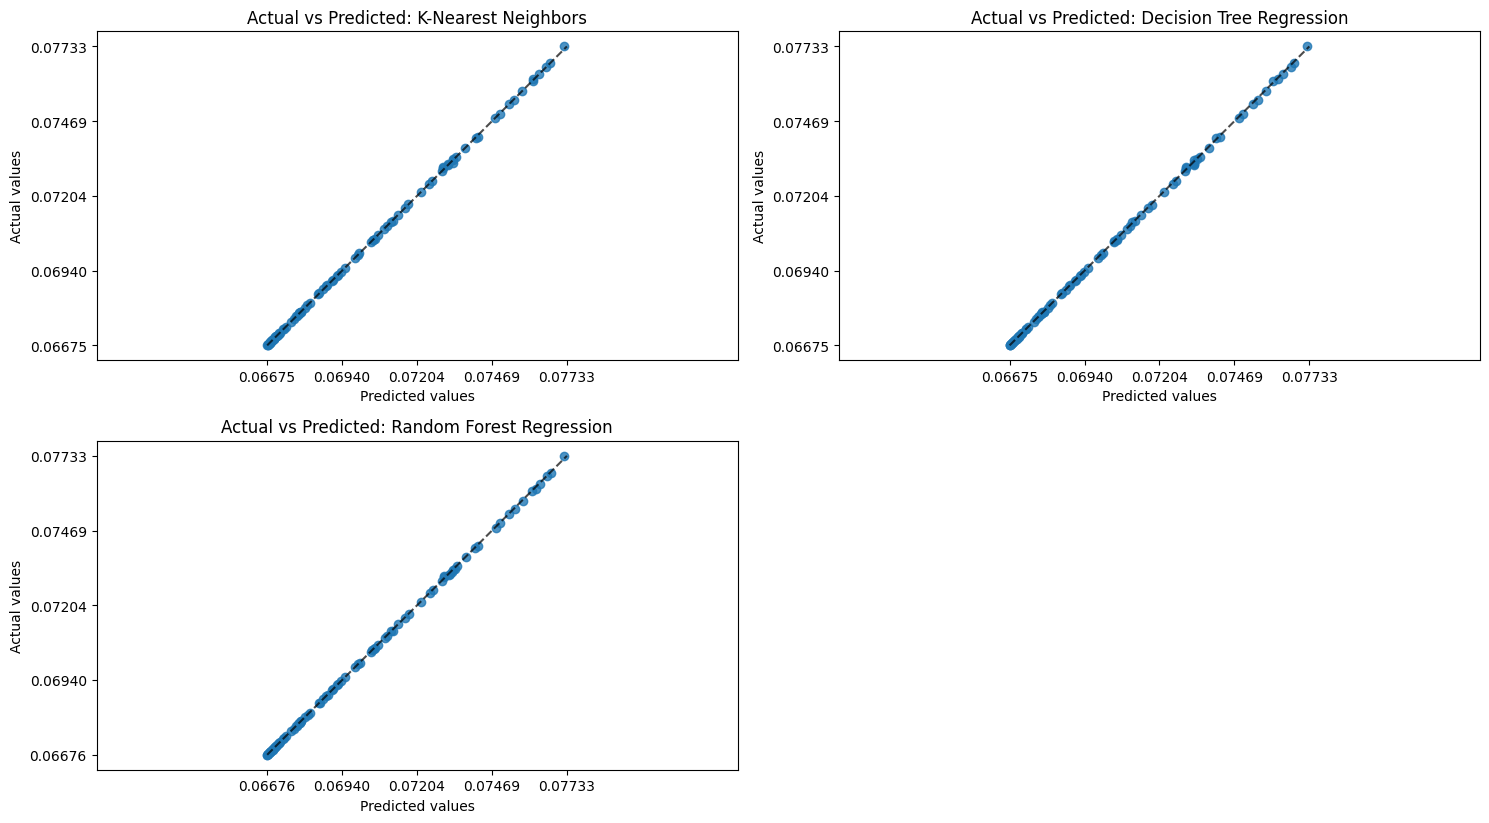

Accuracy test for Temprature 55: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  7.088152e-10  0.999951  0.000011      0.011804
2  Random Forest Regression  6.934233e-10  0.999952  0.000018      0.019616
1  Decision Tree Regression  1.518657e-09  0.999894  0.000031      0.033614

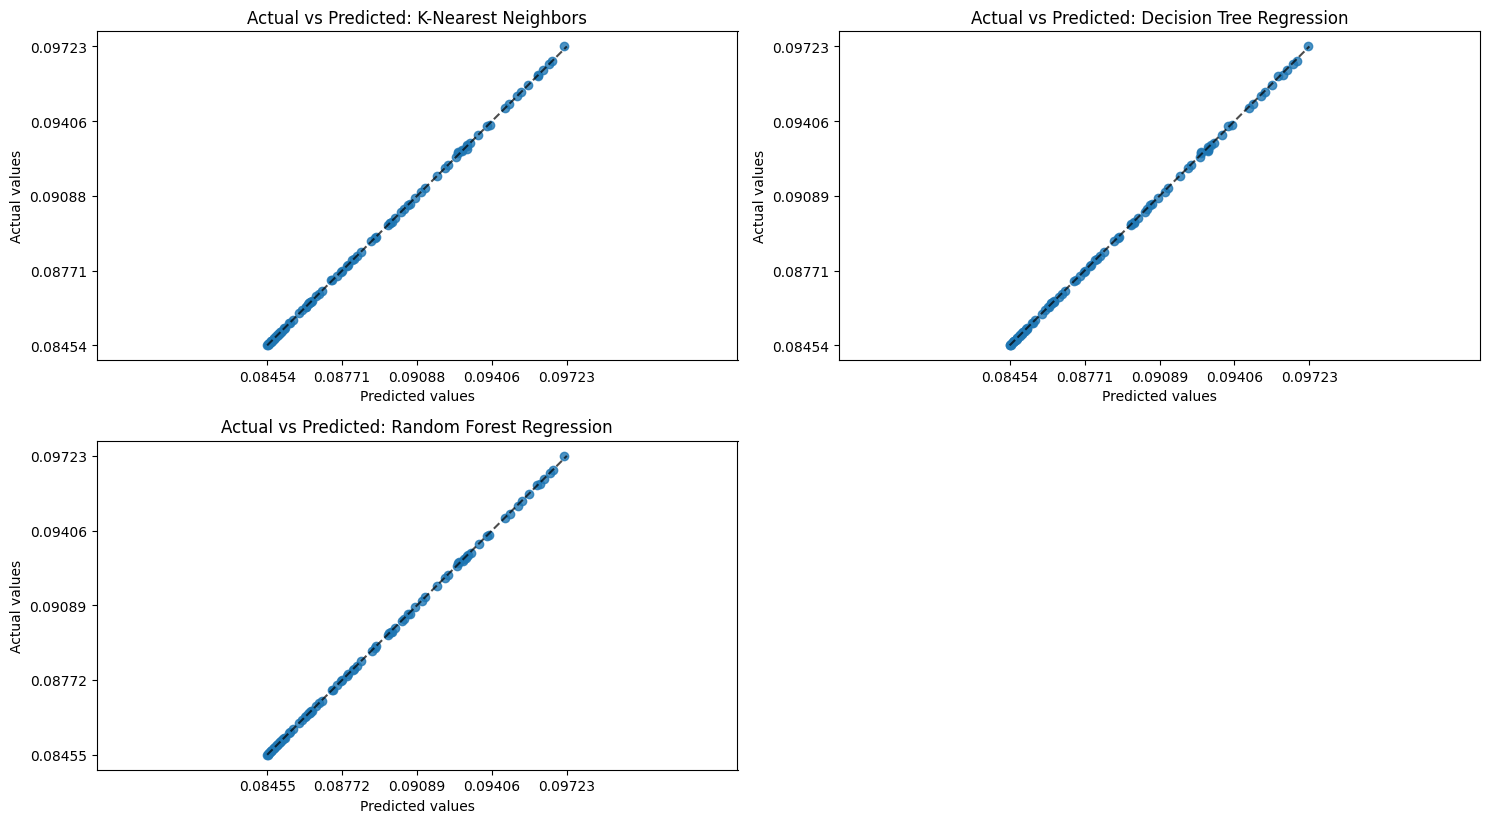

Accuracy test for Temprature 60: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.030213e-09  0.999955  0.000013      0.012139
2  Random Forest Regression  1.005069e-09  0.999956  0.000022      0.020284
1  Decision Tree Regression  2.227108e-09  0.999903  0.000038      0.034937

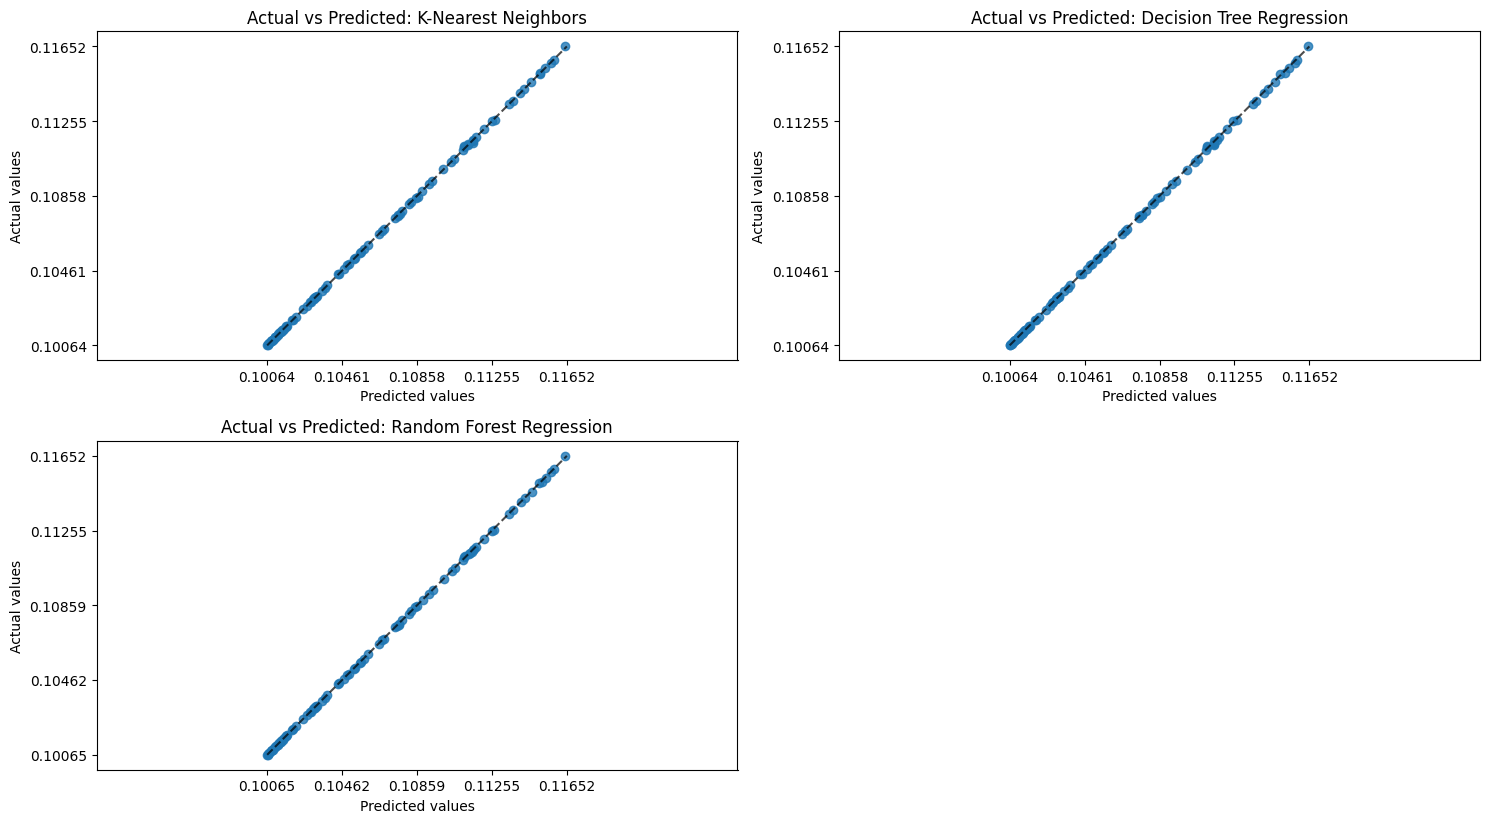

Accuracy test for Temprature 65: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.273339e-09  0.999950  0.000014      0.011615
2  Random Forest Regression  1.246523e-09  0.999951  0.000024      0.019279
1  Decision Tree Regression  2.723795e-09  0.999893  0.000041      0.033003

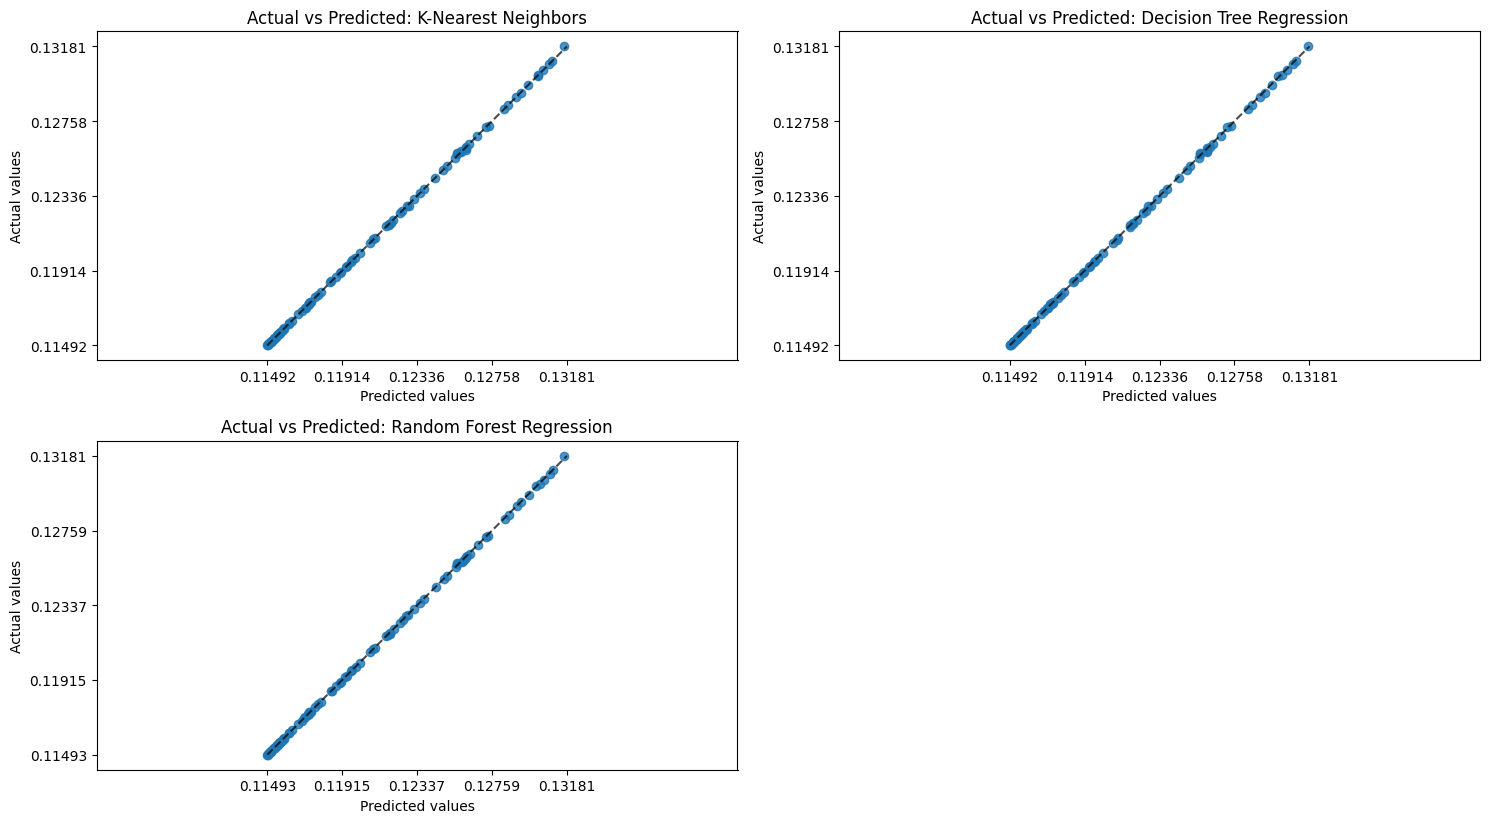

Accuracy test for Temprature 70: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.065055e-09  0.999932  0.000012      0.008942
2  Random Forest Regression  1.061583e-09  0.999932  0.000020      0.014596
1  Decision Tree Regression  2.231998e-09  0.999857  0.000034      0.024571

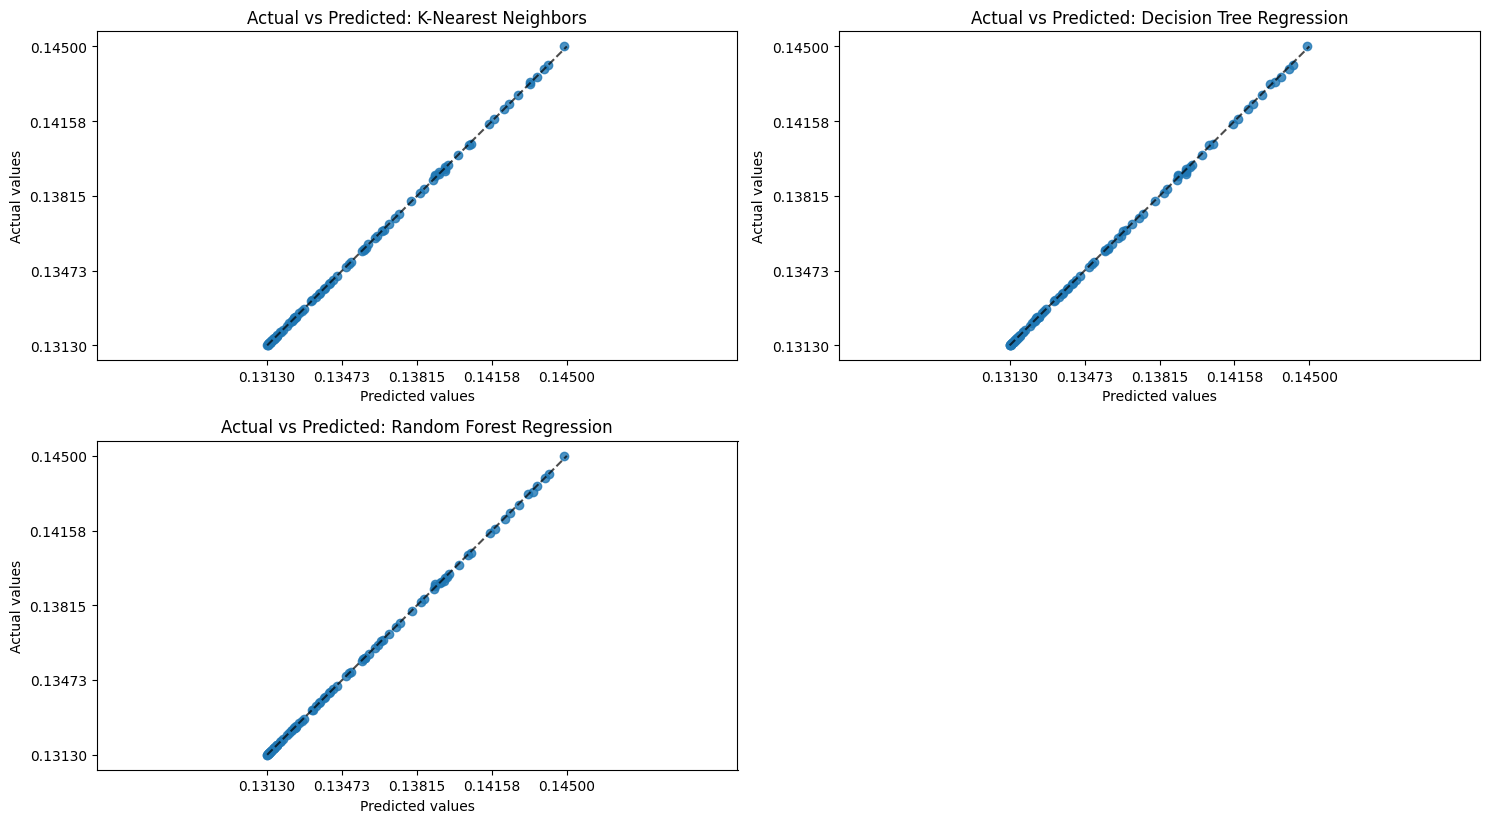

Accuracy test for Temprature 75: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.750964e-09  0.999964  0.000018      0.011475
2  Random Forest Regression  1.704246e-09  0.999965  0.000031      0.019448
1  Decision Tree Regression  3.896475e-09  0.999920  0.000054      0.033920

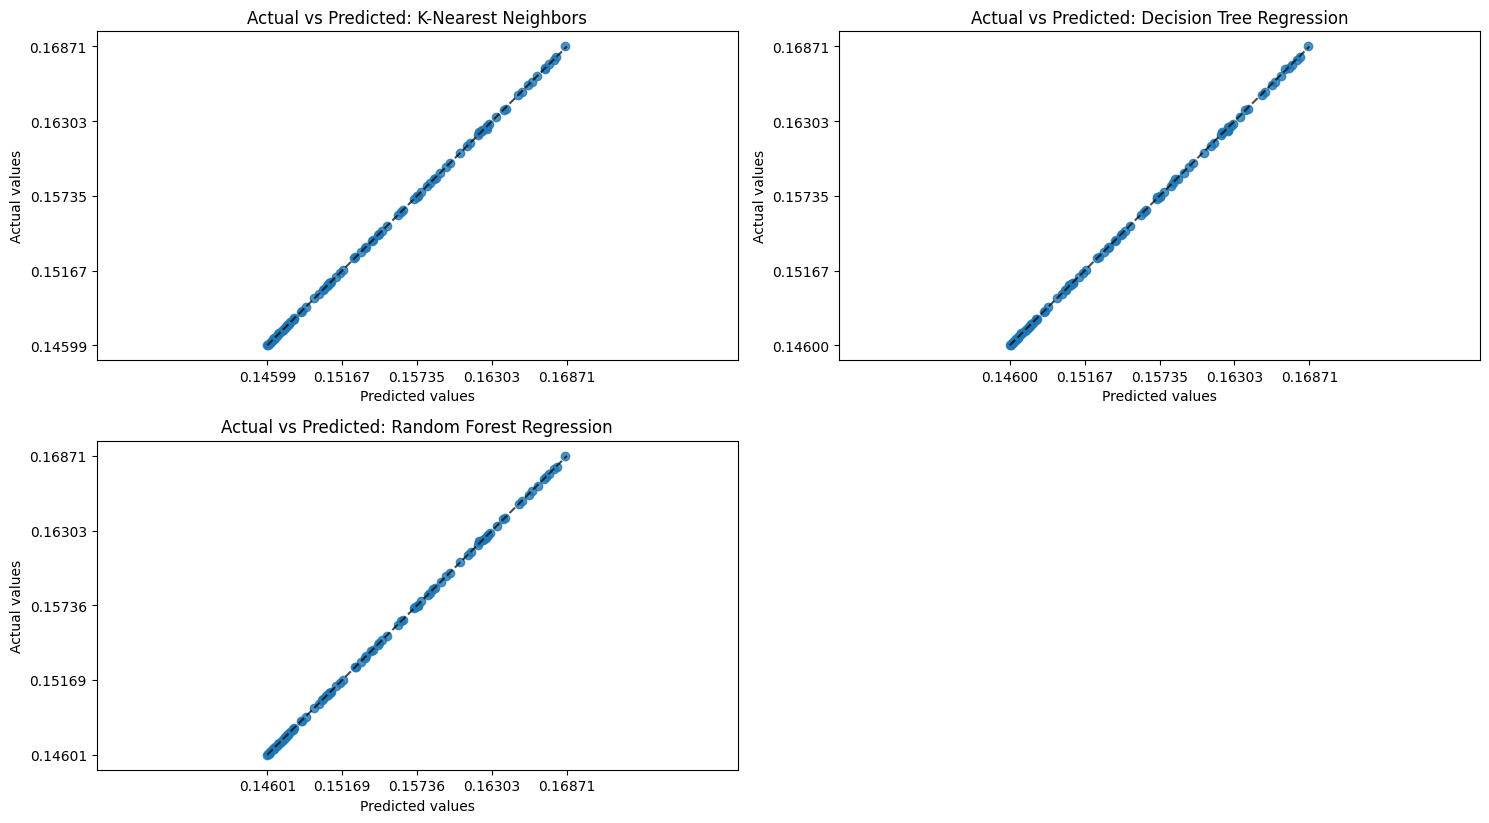

Accuracy test for Temprature 80: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  1.246800e-09  0.999973  0.000016      0.009538
2  Random Forest Regression  1.220436e-09  0.999974  0.000028      0.016493
1  Decision Tree Regression  2.941459e-09  0.999937  0.000050      0.029287

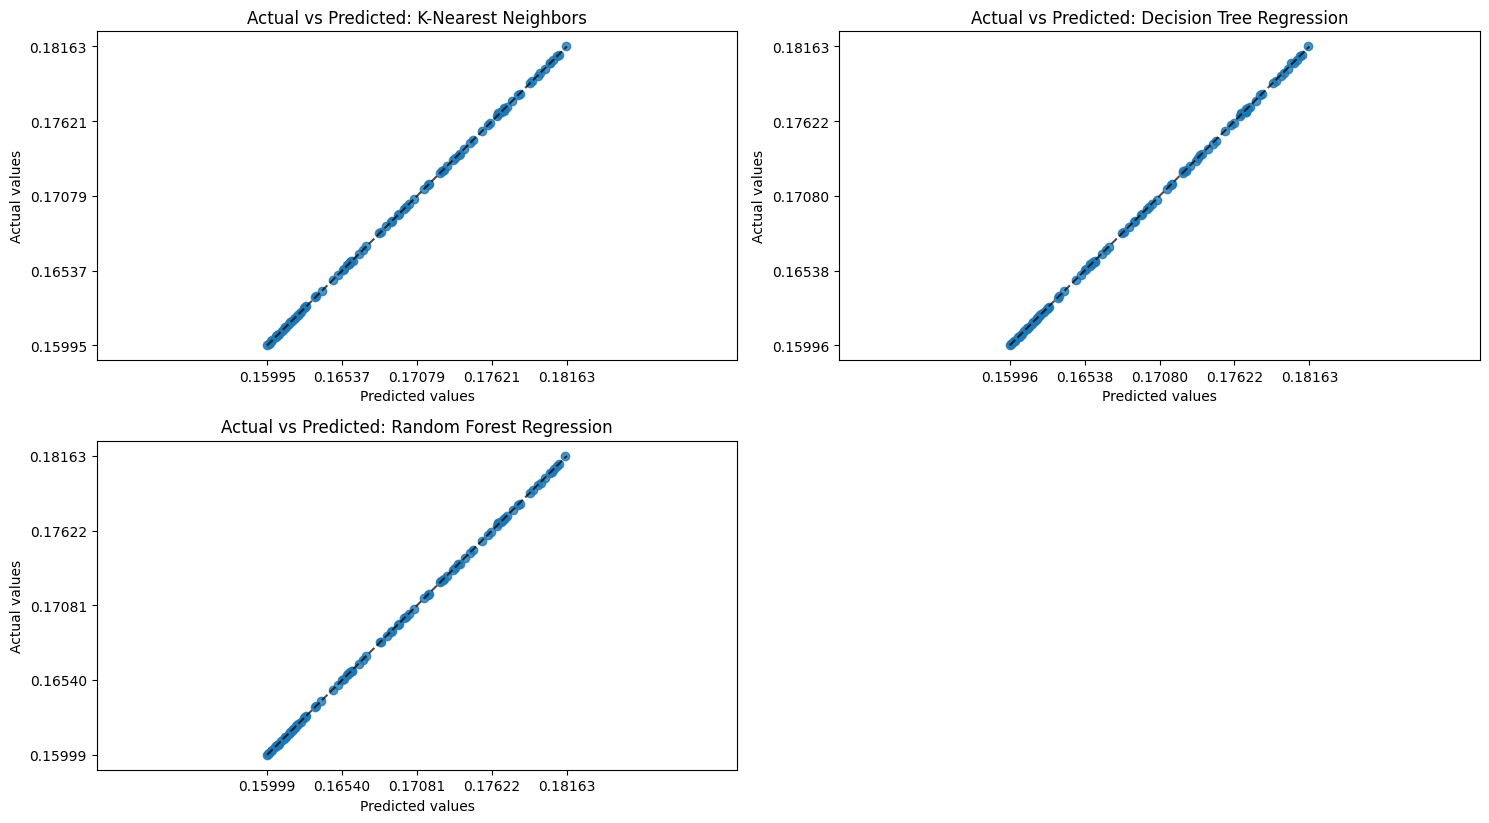

Accuracy test for Temprature 85: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  3.186773e-09  0.999972  0.000026      0.013218
2  Random Forest Regression  3.114260e-09  0.999972  0.000045      0.022799
1  Decision Tree Regression  7.423126e-09  0.999934  0.000079      0.040389

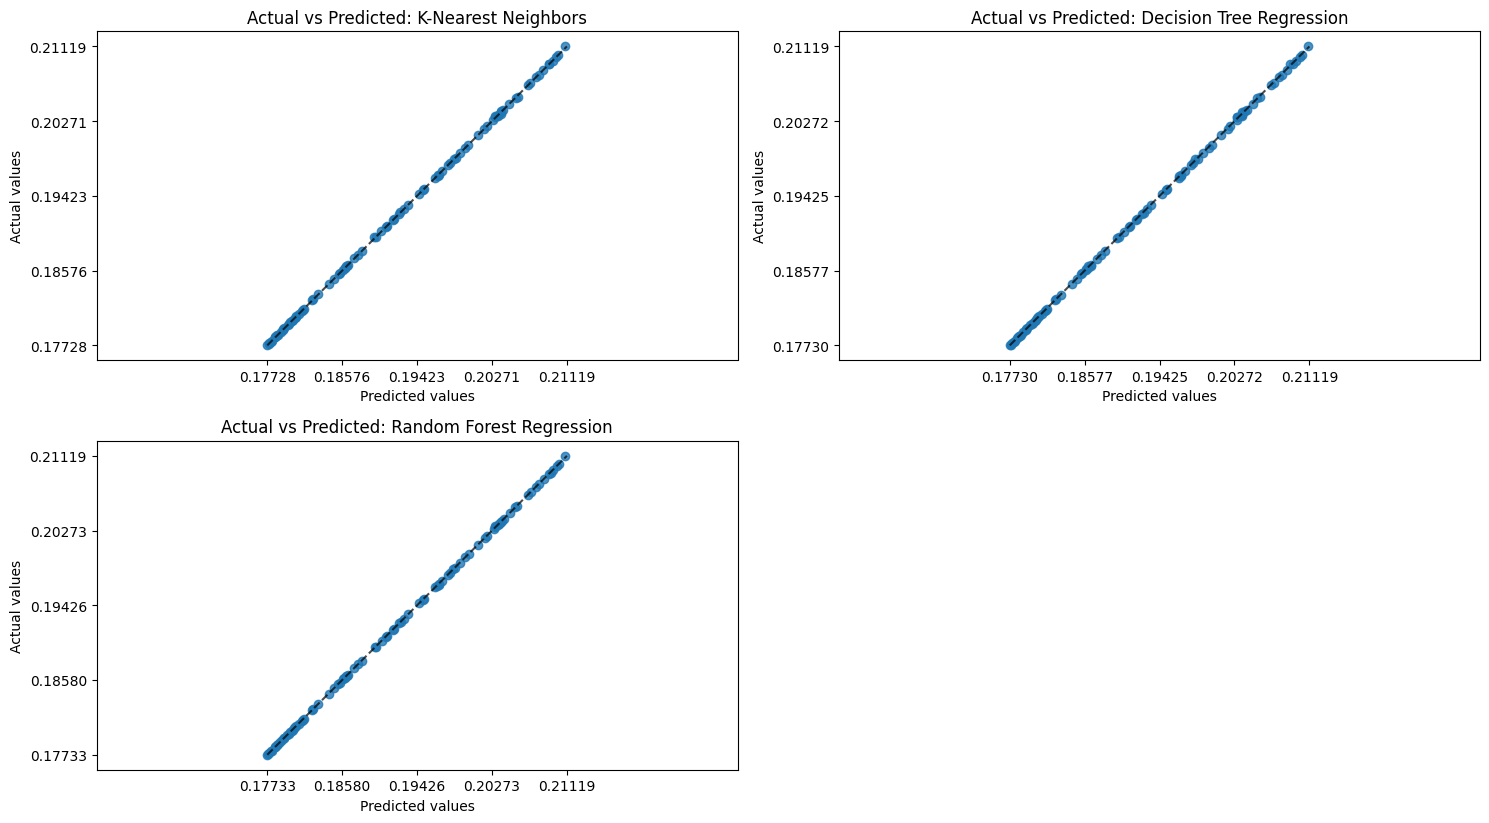

Accuracy test for Temprature 90: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  4.895135e-09  0.999948  0.000028      0.013000
2  Random Forest Regression  4.799023e-09  0.999949  0.000047      0.021543
1  Decision Tree Regression  1.043944e-08  0.999889  0.000079      0.036823

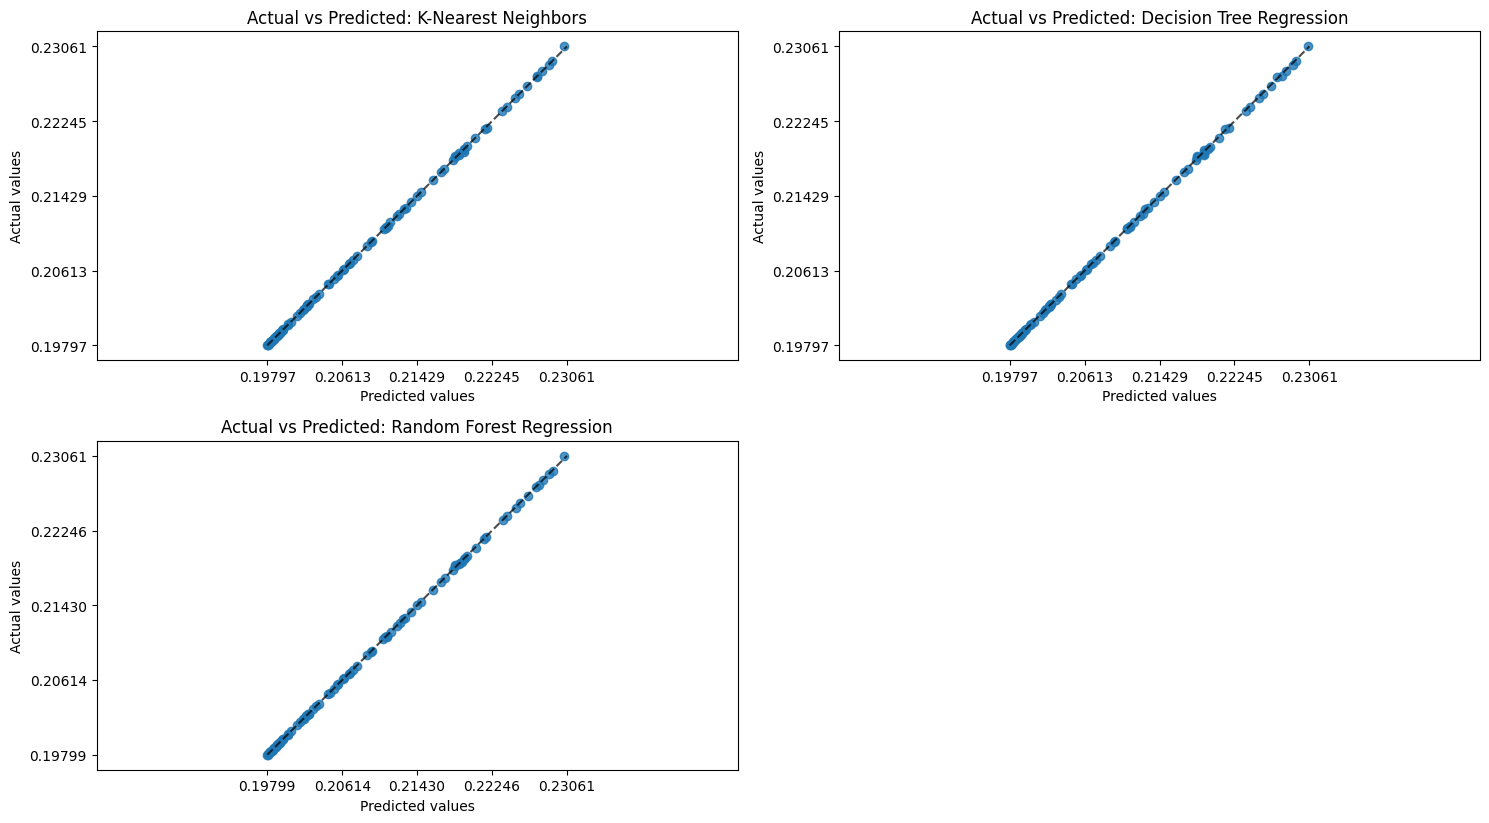

Accuracy test for Temprature 95: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  6.380332e-09  0.999948  0.000032      0.012974
2  Random Forest Regression  6.255059e-09  0.999949  0.000053      0.021499
1  Decision Tree Regression  1.360680e-08  0.999889  0.000090      0.036747

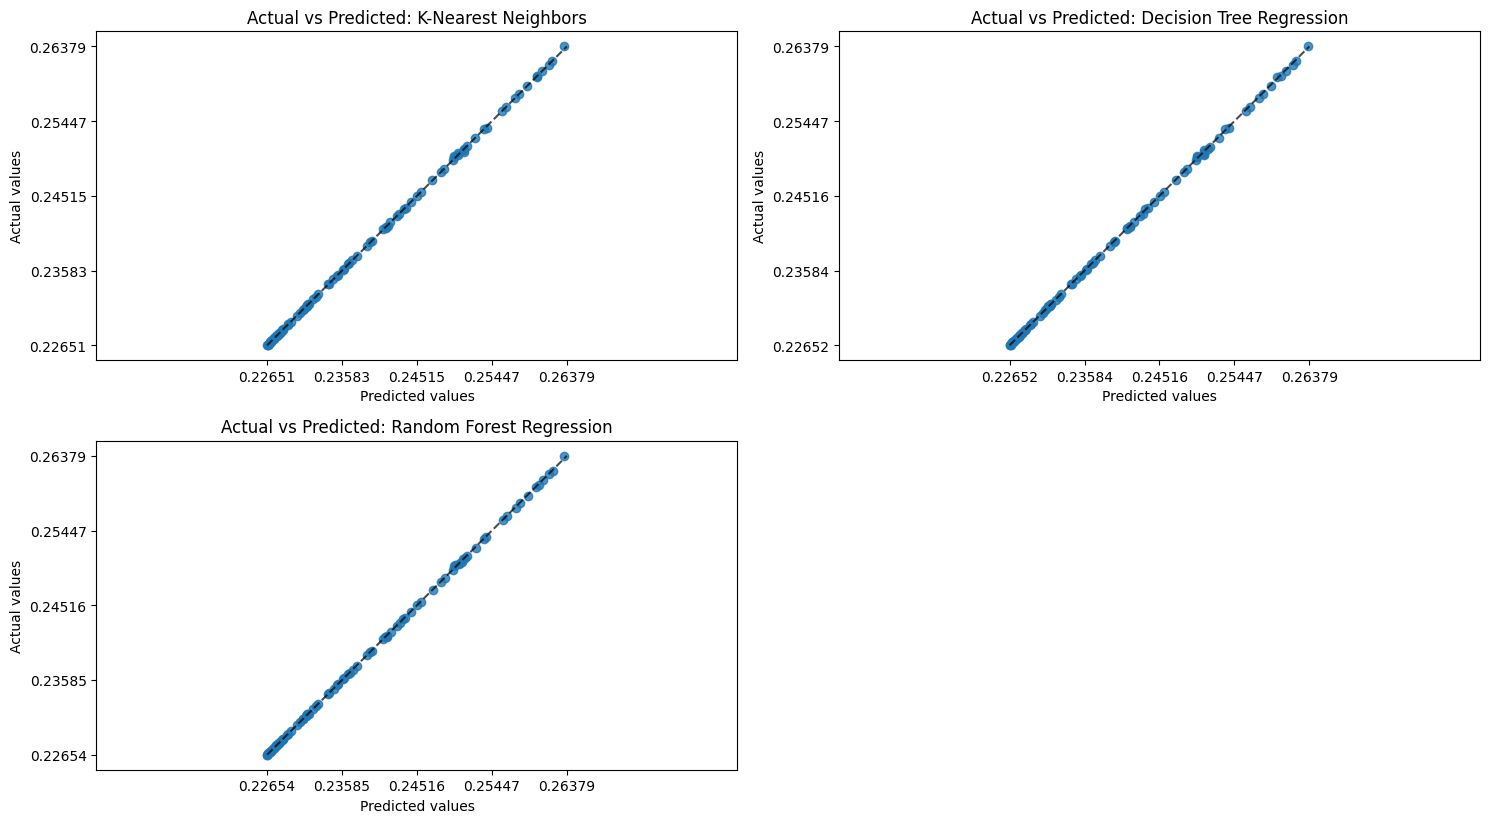

Accuracy test for Temprature 100: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  7.483166e-09  0.999967  0.000039      0.015432
2  Random Forest Regression  7.289494e-09  0.999968  0.000065      0.026362
1  Decision Tree Regression  1.691614e-08  0.999926  0.000114      0.046297

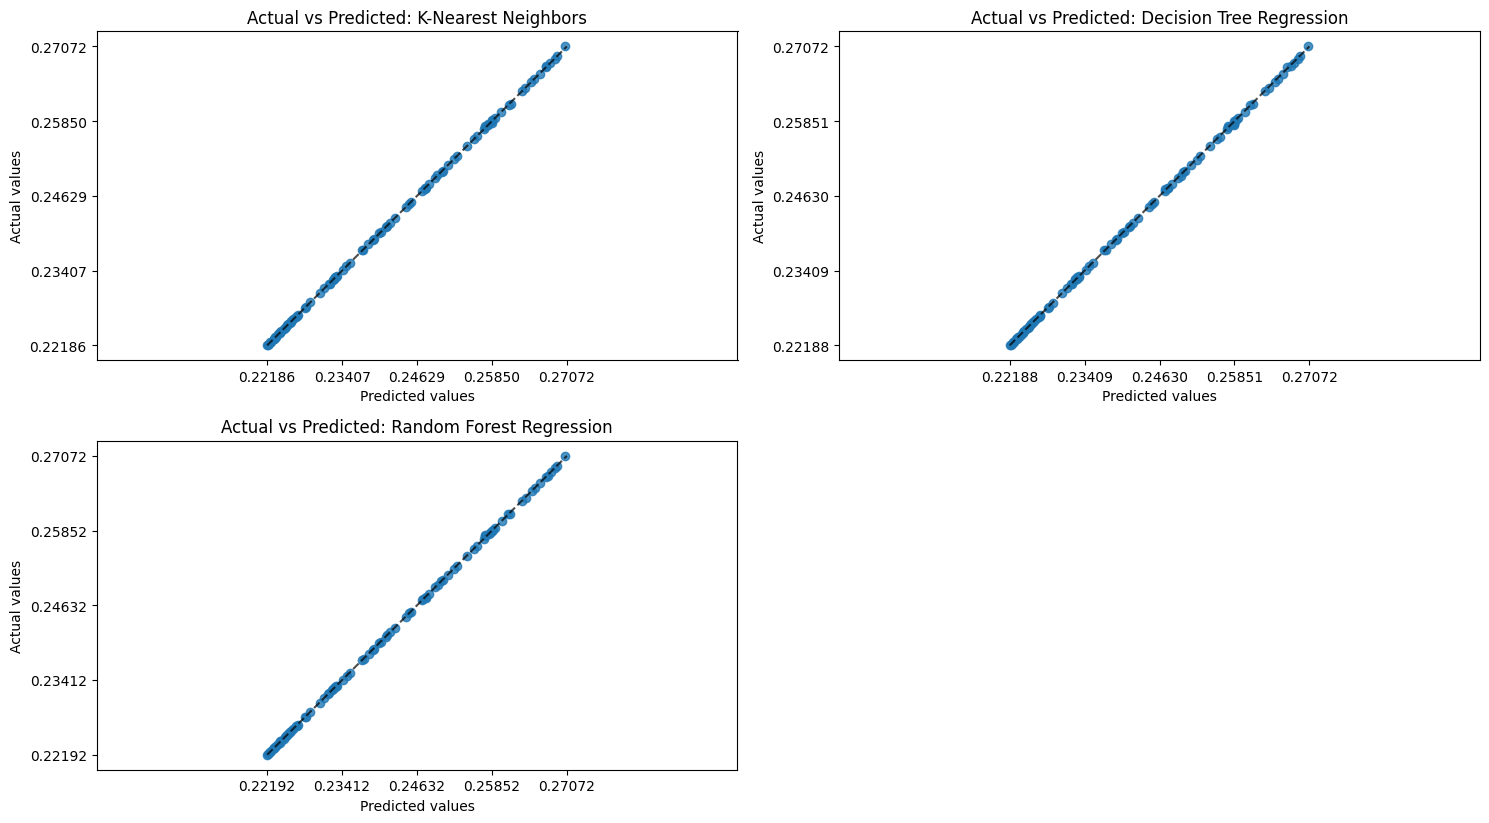

Accuracy test for Temprature 105: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  4.365523e-09  0.999913  0.000024      0.008615
2  Random Forest Regression  4.454314e-09  0.999911  0.000039      0.013920
1  Decision Tree Regression  9.063531e-09  0.999818  0.000064      0.023146

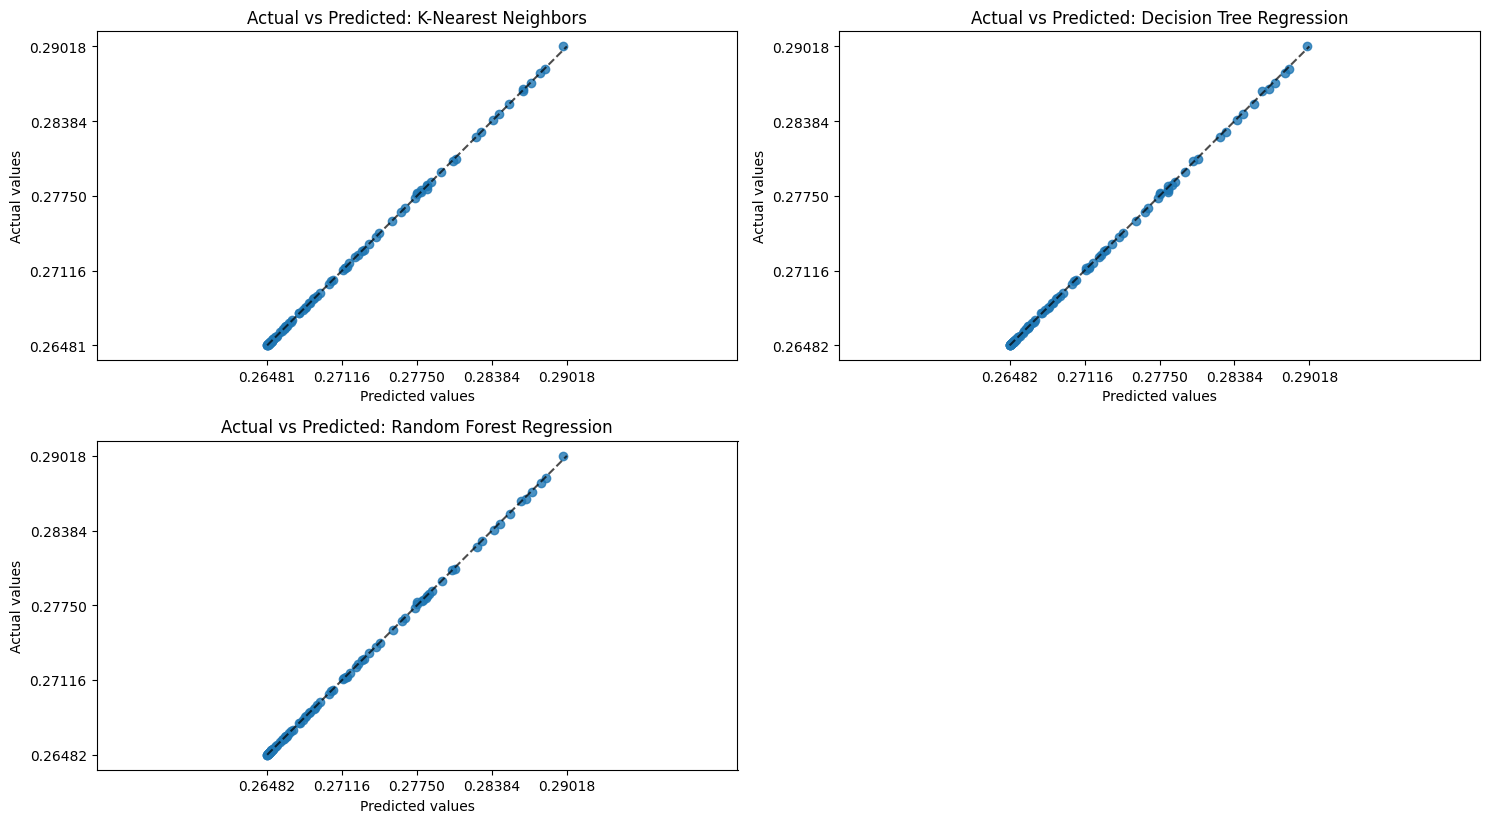

Accuracy test for Temprature 110: 



Model           MSE  R2 Score       MAE  Mean % Error
0       K-Nearest Neighbors  6.104431e-09  0.999975  0.000037      0.013862
2  Random Forest Regression  5.611081e-09  0.999977  0.000064      0.024003
1  Decision Tree Regression  1.473349e-08  0.999940  0.000114      0.043244

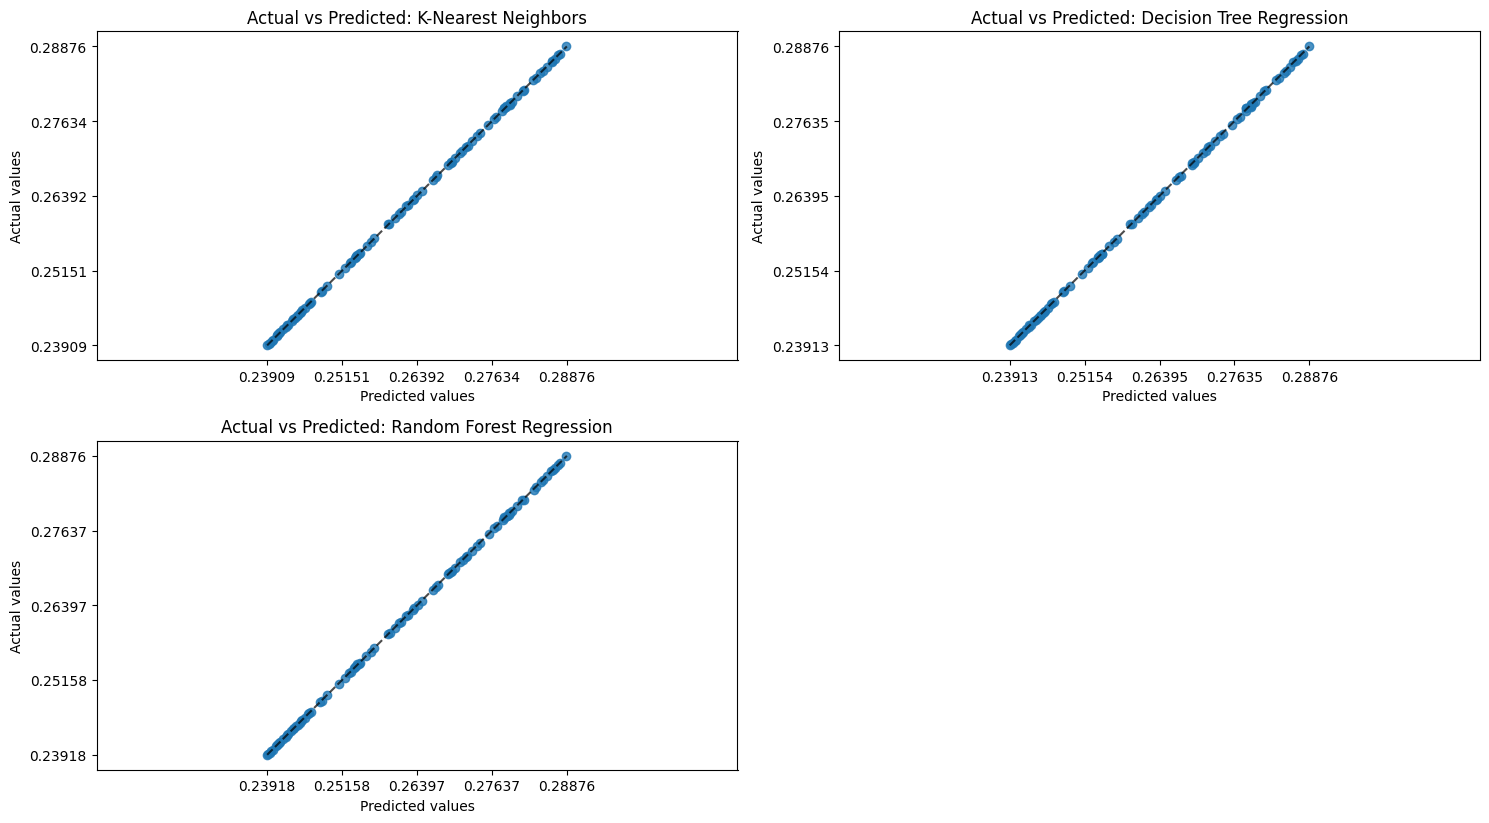

In [168]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from IPython.display import display

for count in range(17):
    print(f"Accuracy test for Temprature {givenTemp[count]}: \n")
    train_data = data_temp_hr_scaled[count]
    test_size=0.2
    random_state=42
    train_data = train_data.dropna()
    X,y = split_data(train_data)

    # test_data = train_data[(train_data["Temprature"] == 30) & (train_data["hour"] == 0)]
    # train_data = train_data[ (train_data["hour"] == 0)]

    # display(test_data,train_data)
    # X_train, y_train = split_data(train_data)
    # X_test, y_test = split_data(test_data)
    # Split training and test data into features (X) and labels (y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # display(X,y)



    # Initialize a results list to store metrics for each model
    results = {
        'Model': [],
        'MSE': [],
        'R2 Score': [],
        'MAE': [],
        'Mean % Error': []  # New column for mean percentage error
    }
    plt.figure(figsize=(15, 12))  # 4x2 grid for subplots
    subplot_idx = 1

    # Train and evaluate K-Nearest Neighbors model
    knn_model = train_knn(X_train, y_train, n_neighbors=numberOfCluster[count])
    y_pred_knn = predict(knn_model, X_test)
    knn_metrics = evaluate_model(y_test, y_pred_knn)
    store_results_and_plot(results, model_name='K-Nearest Neighbors', metrics=knn_metrics, y_test=y_test, y_pred=y_pred_knn)


    # Train and evaluate Decision Tree Regression model
    tree_model = train_decision_tree(X_train, y_train)
    y_pred_tree = predict(tree_model, X_test)
    tree_metrics = evaluate_model(y_test, y_pred_tree)
    store_results_and_plot(results, model_name='Decision Tree Regression', metrics=tree_metrics, y_test=y_test, y_pred=y_pred_tree)


    # Train and evaluate Random Forest Regression model
    rf_model = train_random_forest(X_train, y_train, bestEstimators[count])
    y_pred_rf = predict(rf_model, X_test)
    rf_metrics = evaluate_model(y_test, y_pred_rf)
    store_results_and_plot(results, model_name='Random Forest Regression', metrics=rf_metrics, y_test=y_test, y_pred=y_pred_rf)


    # Compare models
    comparison_df = compare_models(results)  # Print results in console
    plt.tight_layout()
    plt.show()
    # save_results_to_file(results)  # Save results to result.txt

    # Create a DataFrame to save actual and predicted values
    # predictions_df = pd.DataFrame({
    #     'Actual I_pol(t)(uA)': y_test,
    #     'Predicted Linear': y_pred_linear,
    #     'Predicted Polynomial': y_pred_poly,
    #     'Predicted Neural Network': y_pred_nn,
    #     'Predicted KNN': y_pred_knn,
    #     'Predicted SVR': y_pred_svr,
    #     'Predicted Decision Tree': y_pred_tree,
    #     'Predicted Random Forest': y_pred_rf,
    #     'Predicted Gradient Boosting': y_pred_gb
    # })

    # Calculate percent error for each model and add to predictions_df
    # predictions_df['Percent Error Linear'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Linear']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error Polynomial'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Polynomial']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error Neural Network'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Neural Network']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error KNN'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted KNN']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error SVR'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted SVR']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error Decision Tree'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Decision Tree']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error Random Forest'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Random Forest']) / predictions_df['Actual I_pol(t)(uA)']) * 100
    # predictions_df['Percent Error Gradient Boosting'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Gradient Boosting']) / predictions_df['Actual I_pol(t)(uA)']) * 100

    # Save the DataFrame with predictions to a new CSV file
    # predictions_df.to_csv('test_data_with_predictions.csv', index=False)
    # print("Predicted values saved to 'test_data_with_predictions.csv'.")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset (replace with your dataset)
import pandas as pd

for count in range(17):
    X = data_temp_hr_scaled[count].iloc[:, :-3]  # Features
    y = data_temp_hr_scaled[count].iloc[:, -3]   # Target variable (continuous)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the models
    knn_regressor = KNeighborsRegressor(n_neighbors=givenTemp[count])
    rf_regressor = RandomForestRegressor(n_estimators=bestEstimators[count], random_state=42)
    dt_regressor = DecisionTreeRegressor(random_state=42)

    # Train the models
    knn_regressor.fit(X_train, y_train)
    rf_regressor.fit(X_train, y_train)
    dt_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn_regressor.predict(X_test)
    y_pred_rf = rf_regressor.predict(X_test)
    y_pred_dt = dt_regressor.predict(X_test)

    # Plotting the results for each model
    import hvplot.pandas
    import holoviews as hv
    # from bokeh.layouts import layout
    hv.extension('bokeh')

    # Convert the test and prediction results into DataFrames (if not already)
    df_test = X_test.copy()
    df_test['True Values'] = y_test
    df_test['KNN Predicted'] = y_pred_knn
    df_test['RF Predicted'] = y_pred_rf
    df_test['DT Predicted'] = y_pred_dt

    # KNN: Real vs Predicted
    knn_plot = df_test.hvplot.scatter(x=X_test.columns[0], y='True Values', color='blue', label='True Values') * \
            df_test.hvplot.scatter(x=X_test.columns[0], y='KNN Predicted', color='red', label='Predicted Values') \
            .opts(title=f'KNN: True vs Predicted - for temperature {givenTemp[count]}', xlabel='Time', ylabel='I_pol(t)(uA)')

    # Random Forest: Real vs Predicted
    rf_plot = df_test.hvplot.scatter(x=X_test.columns[0], y='True Values', color='blue', label='True Values') * \
            df_test.hvplot.scatter(x=X_test.columns[0], y='RF Predicted', color='red', label='Predicted Values') \
            .opts(title=f'Random Forest: True vs Predicted - for temperature {givenTemp[count]}', xlabel='Time', ylabel='I_pol(t)(uA)')

    # Decision Tree: Real vs Predicted
    dt_plot = df_test.hvplot.scatter(x=X_test.columns[0], y='True Values', color='blue', label='True Values') * \
            df_test.hvplot.scatter(x=X_test.columns[0], y='DT Predicted', color='red', label='Predicted Values') \
            .opts(title=f'Decision Tree: True vs Predicted - for temperature {givenTemp[count]}', xlabel='Time', ylabel='I_pol(t)(uA)')

    # Combine all plots into a layout
    layout = (knn_plot + rf_plot + dt_plot).cols(3)

    # Show the layout
    hv.output(layout)


:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

:Layout
   .Overlay.I   :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (KNN Predicted)
   .Overlay.II  :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (RF Predicted)
   .Overlay.III :Overlay
      .Scatter.True_Values      :Scatter   [Time]   (True Values)
      .Scatter.Predicted_Values :Scatter   [Time]   (DT Predicted)

In [ ]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

for count in range(17):
    # Create the hvPlot scatter/line plot
    plot = data_temp_hr_scaled[count].hvplot.scatter(
        x='Time', 
        y='I_pol(t)(uA)', 
        # marker='o', 
        color='blue', 
        xlabel='Time', 
        ylabel='I_pol(t)(uA)', 
        title=f'Plot between I_pol(t)(uA) and Time - for temperature {givenTemp[count]}', 
        # label='Time vs I_pol(t)(uA)'
    )

    # Display the plot
    hv.output(plot)


:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))

:Scatter   [Time]   (I_pol(t)(uA))